## Mount the drive

In [1]:
# mount the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Removing previous plots and explanations

In [2]:
import glob, os, os.path
mydir = '/content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/GBP_explanation/dropconnect/output_plots/'
filelist = glob.glob(os.path.join(mydir, "*.pdf"))
for f in filelist:
    print(f'removing file {f}')
    os.remove(f)

removing file /content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/GBP_explanation/dropconnect/output_plots/dropconnect_gt_vs_prediction.pdf


## Installing keras uncertainty

In [3]:
# keras_uncertainty imports 
# clone and install this library 

!git clone https://github.com/mvaldenegro/keras-uncertainty.git
!pip install --user git+https://github.com/mvaldenegro/keras-uncertainty.git

%cd keras-uncertainty


fatal: destination path 'keras-uncertainty' already exists and is not an empty directory.
  Cloning https://github.com/mvaldenegro/keras-uncertainty.git to /tmp/pip-req-build-2hx785yy
  Running command git clone -q https://github.com/mvaldenegro/keras-uncertainty.git /tmp/pip-req-build-2hx785yy
/content/keras-uncertainty


## Imports

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

## Load data

In [5]:
# load the california housing data from csv
train_file = '/content/sample_data/california_housing_train.csv'
test_file = '/content/sample_data/california_housing_test.csv'

train_combined = pd.read_csv(train_file)
test = pd.read_csv(test_file)

# split the data in validation and test (from test.csv)
train, val = train_test_split(train_combined, test_size=0.25)

feature_names = list(train_combined.columns)
print(feature_names)

# assign the target variable
target = 'median_house_value'

# extract the target label in all sets
train_labels_df= train[target]
val_labels_df = val[target]
test_labels_df = test[target]

# extract the data from all sets 
train_data_df = train.drop(columns=target, axis=1)
val_data_df = val.drop(columns=target, axis=1)
test_data_df = test.drop(columns=target, axis=1)

train_data_unnormalized = train_data_df.to_numpy()
train_labels_unnormalized = train_labels_df.to_numpy()

val_data_unnormalized = val_data_df.to_numpy()
val_labels_unnormalized = val_labels_df.to_numpy()

test_data_unnormalized = test_data_df.to_numpy()
test_labels_unnormalized = test_labels_df.to_numpy()

# normalize the data using minmax 
minmax = MinMaxScaler() 

train_data = minmax.fit_transform(train_data_unnormalized)
train_label_temp = np.expand_dims(train_labels_unnormalized, axis=1)
train_labels = minmax.fit_transform(train_label_temp)

val_data = minmax.fit_transform(val_data_unnormalized)
val_label_temp = np.expand_dims(val_labels_unnormalized, axis=1)
val_labels = minmax.fit_transform(val_label_temp)

test_data = minmax.fit_transform(test_data_unnormalized)
test_label_temp = np.expand_dims(test_labels_unnormalized, axis=1)
test_labels = minmax.fit_transform(test_label_temp)


print('Training data shape \n', train_data.shape)
print('Training labels shape \n', train_labels.shape)
#print('Training data \n ', train_data)
#print('Training labels \n ', train_labels)

print('Validation data shape \n ',val_data.shape)
print('Validation labels shape \n ', val_labels.shape)
#print('Validation data \n ', val_data)
#print('Validation labels \n ', val_labels)

print('Test data shape \n ', test_data.shape)
print('Test labels shape \n ', test_labels.shape)
#print('Test data \n ', test_data)
#print('Test labels \n ', test_labels)# load the california housing data from csv
train_file = '/content/sample_data/california_housing_train.csv'
test_file = '/content/sample_data/california_housing_test.csv'

train_combined = pd.read_csv(train_file)
test = pd.read_csv(test_file)

# split the data in validation and test (from test.csv)
train, val = train_test_split(train_combined, test_size=0.25)

feature_names = list(train_combined.columns)
print(feature_names)

# assign the target variable
target = 'median_house_value'

# extract the target label in all sets
train_labels_df= train[target]
val_labels_df = val[target]
test_labels_df = test[target]

# extract the data from all sets 
train_data_df = train.drop(columns=target, axis=1)
val_data_df = val.drop(columns=target, axis=1)
test_data_df = test.drop(columns=target, axis=1)

train_data_unnormalized = train_data_df.to_numpy()
train_labels_unnormalized = train_labels_df.to_numpy()

val_data_unnormalized = val_data_df.to_numpy()
val_labels_unnormalized = val_labels_df.to_numpy()

test_data_unnormalized = test_data_df.to_numpy()
test_labels_unnormalized = test_labels_df.to_numpy()

# normalize the data using minmax 
minmax = MinMaxScaler() 

train_data = minmax.fit_transform(train_data_unnormalized)
train_label_temp = np.expand_dims(train_labels_unnormalized, axis=1)
train_labels = minmax.fit_transform(train_label_temp)

val_data = minmax.fit_transform(val_data_unnormalized)
val_label_temp = np.expand_dims(val_labels_unnormalized, axis=1)
val_labels = minmax.fit_transform(val_label_temp)

test_data = minmax.fit_transform(test_data_unnormalized)
test_label_temp = np.expand_dims(test_labels_unnormalized, axis=1)
test_labels = minmax.fit_transform(test_label_temp)


print('Training data shape \n', train_data.shape)
print('Training labels shape \n', train_labels.shape)
#print('Training data \n ', train_data)
#print('Training labels \n ', train_labels)

print('Validation data shape \n ',val_data.shape)
print('Validation labels shape \n ', val_labels.shape)
#print('Validation data \n ', val_data)
#print('Validation labels \n ', val_labels)

print('Test data shape \n ', test_data.shape)
print('Test labels shape \n ', test_labels.shape)
#print('Test data \n ', test_data)
#print('Test labels \n ', test_labels)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Training data shape 
 (12750, 8)
Training labels shape 
 (12750, 1)
Validation data shape 
  (4250, 8)
Validation labels shape 
  (4250, 1)
Test data shape 
  (3000, 8)
Test labels shape 
  (3000, 1)
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Training data shape 
 (12750, 8)
Training labels shape 
 (12750, 1)
Validation data shape 
  (4250, 8)
Validation labels shape 
  (4250, 1)
Test data shape 
  (3000, 8)
Test labels shape 
  (3000, 1)


## Keras uncertainty specific inputs

In [6]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.models import load_model
import random
import pandas as pd 
import os 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

#import keras_uncertainty
#from keras_uncertainty.models import StochasticRegressor, TwoHeadStochasticRegressor
#from keras_uncertainty.models.DeepEnsembleClassifier import DeepEnsemble

##from keras_uncertainty.layers import DropConnectDense, VariationalDense, FlipoutDense, StochasticDropout
#from keras_uncertainty.metrics import gaussian_interval_score
#from keras_uncertainty.losses import regression_gaussian_nll_loss, regression_gaussian_beta_nll_loss
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

## StochasticModel

In [7]:
import numpy as np
import keras_uncertainty.backend as K

Layer = K.keras.layers.Layer
Dropout = K.layers.Dropout


class StochasticModel:
    """
        Stochastic model, requiring several forward passes to produce an estimate of the posterior predictive distribution.
        This class just wraps a keras model to enable dropout at inference time.
    """
    def __init__(self, model, num_samples=10, **kwargs):
        """
            Builds a stochastic model from a keras model. The model should already be trained.
        """
        self.model = model
        self.num_samples = num_samples
    
    def predict_samples(self, x, num_samples=None, batch_size=32, multi_output=False, **kwargs):
        """
            Performs num_samples predictions using the model, and returns the produced output samples.
        """

        if num_samples is None:
            num_samples = self.num_samples

        assert num_samples > 0
        samples = [None] * num_samples

        if "verbose" not in kwargs:
            kwargs["verbose"] = 0

        for i in range(num_samples):
            samples[i] = self.model.predict(x, batch_size=1, **kwargs)

        if multi_output:
            return samples
        else:
            return np.array(samples)
            
            
class StochasticRegressor(StochasticModel):
    def __init__(self, model, num_samples=10, **kwargs):
        # https://stackoverflow.com/questions/62280161/saving-keras-models-with-custom-layers
        super().__init__(model, num_samples)
        self.input = self.model.input
        self.output = self.model.output

    def predict_output(self, inp, num_samples=None, batch_size=32, output_scaler=None, **kwargs):
        """
            Performs a prediction  given input inp using MC Dropout, and returns the mean and standard deviation of the model output.
        """
        samples = self.predict_samples(inp, num_samples, batch_size=batch_size, **kwargs)

        if output_scaler is not None:
            samples = list(map(lambda x: output_scaler.inverse_transform(x), samples))

        mean_pred = np.mean(samples, axis=0)
        std_pred = np.std(samples, axis=0)
        return samples, mean_pred, std_pred 

    def save(self, path):
        # https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object
        self.model.save(path)

    def summary(self):
        return self.model.summary()  

    def evaluate(self, test_data):
        return self.model.evaluate(test_data)

    def get_layer(self, name=None, index=None):
        # https://github.com/keras-team/keras/blob/v2.8.0/keras/engine/training.py#L2797-L2831
    
        """Retrieves a layer based on either its name (unique) or index.
        If `name` and `index` are both provided, `index` will take precedence.
        Indices are based on order of horizontal graph traversal (bottom-up).
        Args:
            name: String, name of layer.
            index: Integer, index of layer.
        Returns:
            A layer instance.
        """
        # TODO(fchollet): We could build a dictionary based on layer names
        # since they are constant, but we have not done that yet.
        if index is not None and name is not None:
            raise ValueError('Provide only a layer name or a layer index. Received: '
                        f'index={index}, name={name}.')

        if index is not None:
            if len(self.layers) <= index:
                raise ValueError(f'Was asked to retrieve layer at index {index}'
                            f' but model only has {len(self.layers)}'
                            ' layers.')
            else:
                return self.model.layers[index]

        if name is not None:
            for layer in self.model.layers:
                if layer.name == name:
                    return layer
            raise ValueError(f'No such layer: {name}. Existing layers are: '
                        f'{list(layer.name for layer in self.model.layers)}.')
        raise ValueError('Provide either a layer name or layer index at '
                     '`get_layer`.')

Keras Uncertainty will use standalone Keras backend

## DropConnect Layer

In [8]:
import keras_uncertainty.backend as K

Dense = K.layers.Dense
Conv1D = K.layers.Conv1D
Conv2D = K.layers.Conv2D
Conv3D = K.layers.Conv3D

class DropConnect:
    def __init__(self, prob=0.5, drop_bias=False, noise_shape=None):
        self.prob = prob
        self.drop_bias = drop_bias
        self.noise_shape = noise_shape
        self.kernel_noise_shape = None
        self.bias_noise_shape = None

    @property
    def needs_drop(self):
        return 0.0 < self.prob < 1.0

    def replace_tensor(self, tensor_train, tensor_test):
        if self.uses_learning_phase:
            return K.in_train_phase(tensor_train, tensor_test)
        else:
            return tensor_train

    def get_noise_shape(self, inputs):
        if self.noise_shape is None:
            return self.noise_shape

        symbolic_shape = K.shape(inputs)
        noise_shape = [symbolic_shape[axis] if shape is None else shape
                       for axis, shape in enumerate(self.noise_shape)]

        return tuple(noise_shape)

    def get_config(self):
        config = {
            "prob": self.prob,
            "drop_bias": self.drop_bias,
            "noise_shape": self.noise_shape
        }

        return config

class DropConnectDense(DropConnect, Dense):
    def __init__(self, units, prob=0.5, drop_bias=False, noise_shape=None, use_learning_phase = False, **kwargs):
        DropConnect.__init__(self, prob=prob, drop_bias=drop_bias, noise_shape=noise_shape)
        Dense.__init__(self, units, **kwargs)

        if self.needs_drop:
            self.uses_learning_phase = use_learning_phase

    def build(self, input_shape):
        Dense.build(self, input_shape)

        if self.needs_drop:
            dc_kernel = K.dropout(self.kernel, self.prob, self.noise_shape)
            self.kernel = self.replace_tensor(dc_kernel, self.kernel)

            if self.drop_bias:
                dc_bias = K.dropout(self.bias, self.prob, self.noise_shape)
                self.bias = self.replace_tensor(dc_bias, self.bias)

    def get_config(self):
        config_dc = DropConnect.get_config(self)
        config_base = Dense.get_config(self)

        return dict(list(config_dc.items()) + list(config_base.items()))

## Load the saved model

In [9]:
# error if the custom object containing the stochastic dropconnect model not passed (Unknown layer: StochasticDropout. Please ensure this object is passed to the `custom_objects` argument)

import os

dir_name = '/content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/GBP_explanation/dropconnect/'
test = os.listdir(dir_name)

for item in test:
    if item.endswith('.h5'):
        print('model name : ', item)
        model = tf.keras.models.load_model('/content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/GBP_explanation/dropconnect/'+item, custom_objects={'DropConnectDense':DropConnectDense})

for layer in model.layers:
    print(layer.get_config())
model.summary()

model name :  dropconnect_model_epochs_3_num_samples_10.h5
{'prob': 0.2, 'drop_bias': False, 'noise_shape': None, 'name': 'drop_connect_dense', 'trainable': True, 'dtype': 'float32', 'units': 64, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'prob': 0.2, 'drop_bias': False, 'noise_shape': None, 'name': 'drop_connect_dense_1', 'trainable': True, 'dtype': 'float32', 'units': 64, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'prob': 0.2, 'drop_bias': False,

## Ground Truth vs prediction plot

In [10]:
# Analysis of the input 
num_of_samples_to_be_explained = 1
start_index = np.random.randint(0, test_data.shape[0])
print('start_index : ', start_index)

test_input = test_data[start_index:start_index+num_of_samples_to_be_explained]
print('test_input shape :', test_input.shape)

test_input_adj = np.expand_dims(test_input, axis=-1)
print('test_input_adj shape :', test_input_adj.shape)

# MODEL PREDICTION AND PLOTTING 
dropconnect_model = StochasticRegressor(model)
pred_samples, pred_mean, pred_std = dropconnect_model.predict_output(test_data, num_samples=5)
#pr = model.predict(test_data)
#print(pr.shape)
print(pred_samples.shape)
print(pred_mean.shape)
print(pred_std.shape)

print(np.unique(pred_std))

start_index :  2441
test_input shape : (1, 8)
test_input_adj shape : (1, 8, 1)


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


(5, 3000, 1)
(3000, 1)
(3000, 1)
[0.         0.00029261 0.00316755 ... 0.30334827 0.30949178 0.3171425 ]


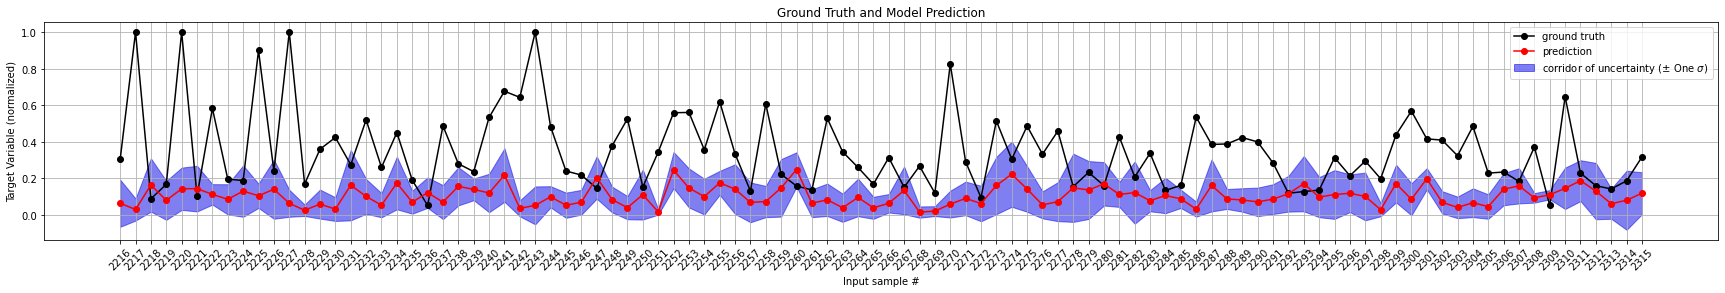

In [11]:
# function to visualize the ground truth with the predicted value and (corridor of uncertainty)
# this time to check if the model still exhibits the "corridor of uncertainty behaviour" (as in stochastic behaviour during inference time) 
def plot(ground_truth, prediction_mean, prediction_std, path, indices_to_be_plotted):
    plt.figure(figsize=(30, 4))
    plt.plot(range(ground_truth.shape[0]),  ground_truth, color='k', label='ground truth', marker='o')
    plt.plot(range(ground_truth.shape[0]), prediction_mean, color='r', label='prediction', marker='o')
   
    y_pred_mean = prediction_mean.reshape((-1,))
    y_pred_std = prediction_std.reshape((-1,))
    y_pred_up_1 = y_pred_mean + y_pred_std
    y_pred_down_1 = y_pred_mean - y_pred_std

    plt.fill_between(range(ground_truth.shape[0]), y_pred_down_1, y_pred_up_1, color=(0, 0, 0.9, 0.7), label='corridor of uncertainty ($\pm$ One $\sigma$) ', alpha=0.5)
    #plt.plot(range(ground_truth.shape[0]), y_pred_mean, '.', color=(0, 0.9, 0.0, 0.8), markersize=0.2, label='Mean')

    #plt.set_title('{}\nInterval Score: {:.2f}'.format(key, score))
    #plt.set_ylim([-20.0, 20.0])

    #plt.axvline(x=-4.0, color='black', linestyle='dashed')
    #plt.axvline(x= 4.0, color='black', linestyle='dashed')
    #plt.get_xaxis().set_ticks([])
    #plt.get_yaxis().set_ticks([])    

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.legend()
    plt.grid()
    plt.xticks(range(len(indices_to_be_plotted)), indices_to_be_plotted, rotation=45)
    plt.xlabel('Input sample #')
    plt.ylabel('Target Variable (normalized)')
    plt.title('Ground Truth and Model Prediction')
    plt.savefig(path)
    plt.show()


start_index = np.random.randint(test_data.shape[0]-150)
random = range(start_index, start_index+100)
test_labels_plot= np.asarray([float(test_labels[i]) for i in random])
mean_dropconnect_plot = np.asarray([float(pred_mean[i]) for i in random])
std_dropconnect_plot = np.asarray([float(pred_std[i]) for i in random])

plot(test_labels_plot, mean_dropconnect_plot, std_dropconnect_plot, '/content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/GBP_explanation/dropconnect/output_plots/dropconnect_gt_vs_prediction.pdf', random)

## Plot explanation function

In [12]:
# code for horizontal bar chart 

def plot_explanation(grads_plot, sample_number=None, err=None, save_file_path=None):
    plt.figure(figsize=(15, 10))
    #plt.barh(pos, vals, color=colors) #this code works well but does not have legend or text in int

    colors = ['C1' if x > 0 else 'C0' for x in list(grads_plot)] # originally negative=red and positive=green (coloring scheme)
    colors_set = set(colors)
    #print('colors_set before ', colors_set)
    colors_set = ['positive' if c == 'C1' else 'negative' for c in colors_set]
    #print('colors_set after ', colors_set)
    exp = list(grads_plot)
    pos = np.arange(len(exp)) + .5
    #print('pos values for plot are ', pos)

    vals = [float(x) for x in exp]
    vals_str = [str(round(val, 3)) for val in vals]
    #print('vals_str ', vals_str)

    #colors = ['r', 'g', 'b']
    labels = colors_set 
    legend_colors = list(set(colors))
    #print(legend_colors)
    handles = [plt.Rectangle((0,0),1,1, color=legend_colors[label]) for label in range(len(labels))]
    #print(handles)

    vals = [np.abs(num) if num  == 0 else num for num in vals] # removing the sign from 0 vals
    #print('vals ', vals)

    #max_horizontal_value_to_plot_text_box = np.max(vals)

    for i, v in enumerate(vals):
        if err is None:
            # in case the text box needs to be moved along the bar then switch 0 to v
            plt.text(v, i+0.5, str(round(v, 3)), Bbox = dict(facecolor = 'grey', alpha =0.2)) # https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

        elif err is not None:
            # in case of the combined explanation, the text box should contain the mean+-std as well
            plt.text(v, i+0.7, str(round(v, 3))+'$\pm$'+str(round(err[i], 3)), Bbox = dict(facecolor = 'grey', alpha =0.2))

    axx = plt.barh([i for i in pos], vals, xerr=err, align='center', color=colors) # this code appropriate legend
    
    plt.grid(alpha=0.5)
    plt.ylabel('feature names')
    plt.xlabel('feature coefficient')
    plt.yticks(pos, feature_names[:-1])

    if err is not None:
        error = plt.plot([], label='corridor of uncertainty ($\pm \sigma$)', linewidth=3, linestyle='-', color='k')
        plt.title('combined explanation')
        main_bars = [plt.Rectangle((0,0),1,1, color=legend_colors[label]) for label in range(len(labels))]
        #first_legend = plt.legend(handles=error)
        #second_legend = plt.legend(handles=main_bar)
        
        handles = error + main_bars #https://stackoverflow.com/questions/28732845/combine-two-pyplot-patches-for-legend       
        error_label = ['corridor of uncertainty ($\pm \sigma$)']
        main_bars_label = colors_set

        labels = error_label + main_bars_label
        plt.legend(handles, labels)

    else:
        handles=[plt.Rectangle((0,0),1,1, color=legend_colors[label]) for label in range(len(labels))]
        plt.title(f'explanation for sample_number {sample_number}')
        plt.legend(handles, labels) # https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column

    plt.subplots_adjust()
    plt.savefig(save_file_path+'.pdf')

## Compute GBP explanation

In [13]:
def gbp_explanation(test_input, layer_name, model, num_samples_explanations_to_be_generated, sample_id):
    @tf.custom_gradient
    def guidedRelu(x):
        #https://towardsdatascience.com/how-to-visually-explain-any-cnn-based-models-80e0975ce57
        def grad(dy):
            return tf.cast(dy>0,'float32') * tf.cast(x>0, 'float32') * dy
        return tf.nn.relu(x), grad

    
    LAYER_NAME = layer_name

    # create a model till last convolutional layers to have the best compromise between high-level semantics and detailed spatial information
    gb_model = tf.keras.models.Model(inputs = [model.input],    
                                     outputs = [model.get_layer(LAYER_NAME).output])
    
    layer_dict = [layer for layer in gb_model.layers[1:] if hasattr(layer,'activation')]
    #value = model.get_layer(LAYER_NAME).output.shape[-1]  # to compute the number of channels in the volume at a particular layer 

    for layer in layer_dict:
        if layer.activation == tf.keras.activations.relu:
            layer.activation = guidedRelu

    feature_weight_list = [] 
    for i in range(num_samples_explanations_to_be_generated):
        print('xxxxxxxxxxxxxxxxxxxxxxxxxx')
        print('Example to be explained : ' , test_input)
        with tf.GradientTape() as tape:
            inputs = tf.cast(test_input, tf.float32)
            tape.watch(inputs)
            # NO NEED TO RUN THIS (the if condition) AS VISUALIZATION OF ENSEMBLE HEATMAPS FOR INNER LAYER WOULD MAKE NO SENSE : FILTER IN EVERY INDIVIDUAL ENSEMBLE UNIT WOULD LEARN SOMETHING DIFFERENT EVERYTIMG
            # THIS THESIS NEEDS TO FOCUS ON FINAL LAYER HEATMAPS (AS THEY SHOULD BE SAME FOR A GIVEN INPUT ACROSS ENSEMBLES)
                    
            #outputs = gb_model.predict(inputs) 
            outputs = gb_model(inputs)
            # essentially model() and model.predict() yield the same output with the difference that 
            # https://stackoverflow.com/questions/55308425/difference-between-modelx-and-model-predictx-in-keras#:~:text=The%20format%20may%20be%20different,its%20structure%2C%20weights%20and%20biases.
            #Today given a model in tensorflow 2.0 (built using the keras library), #out_np = model.predict(x) provides a numpy array which can, as an example, be printed with print(out_np).
            #On the other hand,out_tf = model(x) results into a tensorflow object, wich can be converted to a numpy array with .numpy()

    
            print('feature_names ', feature_names)
            print('outputs ', outputs)

            grads = tape.gradient(outputs, inputs)[0]# selecting that unit in dense layer that has the maximum activation for a given input,,,, if[0] not selected then shape of grads is: [1,32,32,3] 
            print('grads ', grads)

            grads = grads.numpy() #as the model(inputs) returns a tensor and this is eventually used in the gradient computation, for plotting purpose this needs to be converted in np

            # normalizing the value of computed gradient for each feature [04032022 update : no need to normalize the gradients as it is only useful for visualization in heatmap ]
            # in bar charts, the gradients can remain negative 
            #grads -= np.min(grads)
            #grads /= np.max(grads)
        
        print('normalized_grads : ', grads)
        feature_weight_list.append(grads)
        plot_explanation(grads_plot=grads, 
                         sample_number=i, 
                         err=None, 
                         save_file_path='/content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/GBP_explanation/dropconnect/output_plots/explanation_for_sample_number_'+str(i)+'_input_id_'+str(sample_id))   
    
    print('feature_weight_list : ', feature_weight_list)
    feature_weight_arr =  np.asarray(feature_weight_list)
    feature_weight = np.reshape(feature_weight_arr, (num_samples_explanations_to_be_generated, -1))
    # the mean and the std of the different explanations of the samples is computed here 
    mean_feature_weight = np.mean(feature_weight_arr, axis=0)
    std_feature_weight = np.std(feature_weight_arr, axis=0)

    #print(mean_feature_weight)
    #print(std_feature_weight)

    

    plot_explanation(grads_plot=mean_feature_weight, 
                     sample_number=None, 
                     err=std_feature_weight,
                     save_file_path='/content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/GBP_explanation/dropconnect/output_plots/combined_explanation_of_'+str(num_samples_explanations_to_be_generated)+'_samples_for_input_id_'+str(sample_id))
    
    return mean_feature_weight, std_feature_weight

In [14]:

# Analysis of the input 
test_sample_index=np.random.randint(3000)
test_input_temp = test_data[test_sample_index]
test_input = np.expand_dims(test_input_temp, axis=0)
print('test_input shape :', test_input.shape)
mean_feature_weight, std_feature_weight = gbp_explanation(test_input, 
                                                          'drop_connect_dense_5',
                                                          dropconnect_model, 
                                                          num_samples_explanations_to_be_generated=20,
                                                          sample_id=test_sample_index)

test_input shape : (1, 8)
xxxxxxxxxxxxxxxxxxxxxxxxxx
Example to be explained :  [[0.45098039 0.20405983 0.49019608 0.14373932 0.11371608 0.14442582
  0.11870942 0.4809244 ]]
feature_names  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
outputs  Tensor("model/drop_connect_dense_5/IdentityN:0", shape=(1, 1), dtype=float32)
grads  Tensor("strided_slice:0", shape=(8,), dtype=float32)


AttributeError: ignored

In [ ]:
# coefficient of variation / relative standard deviation (RSD) (sigma divided by mu) 
# https://link.springer.com/chapter/10.1007/978-3-642-80328-4_13 [source that 30% cv could act as a threshold]
# https://en.wikipedia.org/wiki/Coefficient_of_variation
# https://www.formpl.us/blog/coefficient-variation

print('mean_feature_weight ', mean_feature_weight)
print('std_feature_weight ', std_feature_weight)
print('feature_names ', feature_names)

eps=1e-3
# compute coefficient of variation 
coefficient_of_variation = [100*(i/(j+eps)) if -0.001<j<0.001 else 100*(i/j) for i,j in zip(std_feature_weight, mean_feature_weight)]
print('coefficient_of_variation ', coefficient_of_variation)


plt.figure(figsize=(15, 10))
colors = ['C1' if x > 0 else 'C0' for x in list(coefficient_of_variation)] # originally negative=red and positive=green (coloring scheme)
colors_set = set(colors)
legend_colors = list(set(colors))
colors_set = ['positive' if c == 'C1' else 'negative' for c in colors_set]

bars = [plt.Rectangle((0,0),1,1, color=legend_colors[label]) for label in range(len(colors_set))]
#uncomment the next 2 line in case cv threshold is needed 
#thresh = plt.plot([], label='threshold', linewidth=3, linestyle='-', color='k')
#handles = bars + thresh

main_bars_label = colors_set

# uncomment following two lines in case cv threshold is needed
#error_label = ['threshold']
#labels = main_bars_label + error_label 

# uncomment following two lines to remove threshold
handles = bars 
labels = main_bars_label

plt.bar(feature_names[:-1], coefficient_of_variation, color=colors)
# uncomment the following 2 lines to get the threshold lines
#plt.plot(feature_names[:-1], [30]*len(feature_names[:-1]), '--k')
#plt.plot(feature_names[:-1], [-30]*len(feature_names[:-1]), '--k')
plt.xticks(rotation=90)
plt.xlabel('feature name')
plt.ylabel(r'coefficient of variation : 100 $\times$ ($\sigma$ / $\mu$ )%')
plt.grid(alpha=0.2) 


plt.legend(handles, labels)
plt.title('feature name v/s coefficient of variation')

for i, v in enumerate(coefficient_of_variation):
    # in case the text box needs to be moved along the bar then switch 0 to v
    plt.text(i, v, str(round(v, 3)), rotation=90, Bbox = dict(facecolor = 'grey', alpha =0.2)) # https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

plt.savefig('/content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/GBP_explanation/dropout/output_plots/feature_name_vs_coefficient_of_variation_'+
            str(test_sample_index)+'.pdf', bbox_inches='tight')

#https://en.wikipedia.org/wiki/Kurtosis